# TSF TASK 2 (prediction with Unsupervised learning with K-Means Clustering)

In [87]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [88]:
#Load Data
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
df.shape

(150, 6)

In [90]:
df=df.drop(['Id','Species'], axis='columns')

In [91]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
#Transform the data
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [115]:
# A list holds the SSE values for each k and Importing KMeans module and Initialize the class object
sse = []
for i in range(1, 11):
    kmeans =  KMeans(init="random",n_clusters=i,  n_init=10,max_iter=300,random_state=42 )
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

In [116]:
#The lowest SSE value
kmeans.inertia_

51.967015045615554

In [117]:
#The number of iterations required to converge
kmeans.n_iter_

9

In [118]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.03337431, -0.44161429,  0.28388956,  0.15398483],
       [-0.3813903 ,  2.28824475, -1.30065404, -1.20028561],
       [-0.92491474,  1.0690817 , -1.28213207, -1.21305727],
       [ 0.40523921, -1.41052963,  0.72484817,  0.54225296],
       [-1.38535265, -0.03496756, -1.3381132 , -1.33488889],
       [ 0.8764476 ,  0.04473791,  0.54287792,  0.43123134],
       [ 1.84982949, -0.28693968,  1.38259482,  1.05353673],
       [ 0.40665638, -0.40507698,  0.80765262,  0.97050117],
       [ 1.19379202,  0.66842399,  1.13644755,  1.44795564],
       [-0.59776149, -1.46378904,  0.00725715, -0.05459259]])

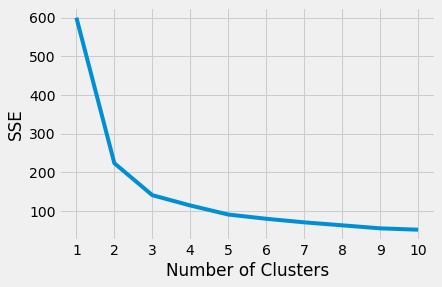

In [119]:
# Visualise the no of cluster with elbow method
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

From the above graph we can conclude Thus for the given data, the optimal number of clusters for the data is 3.


In [131]:
#predict the labels of clusters.
kmeans = KMeans(init="random",n_clusters=3,  n_init=10 ,max_iter=300,random_state=42 )

ykmeans = kmeans.fit_predict(df)

In [132]:
ykmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [134]:
#printing the centroids and Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(ykmeans)

In [165]:
#naming the output cluster category
iris_category=["Iris-setosa","Iris-versicolour", "Iris-virginica"]

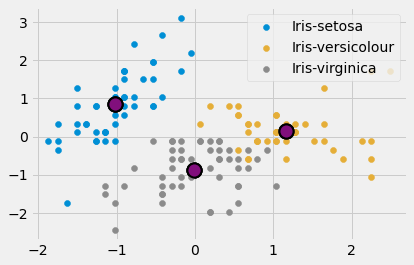

In [166]:
#printing the results and visualise the clusters with centroids
for i in u_labels:
    plt.scatter(df[ykmeans == i , 0] , df[ykmeans == i , 1] , label =iris_category[i])
    plt.scatter(centroids[:,0] , centroids[:,1] , edgecolors="k", linewidth=2,  s=200, alpha=1)
plt.legend()
plt.show()